In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Three distributions have same variance but different in mean. `p` has high chance to be the same as `y`

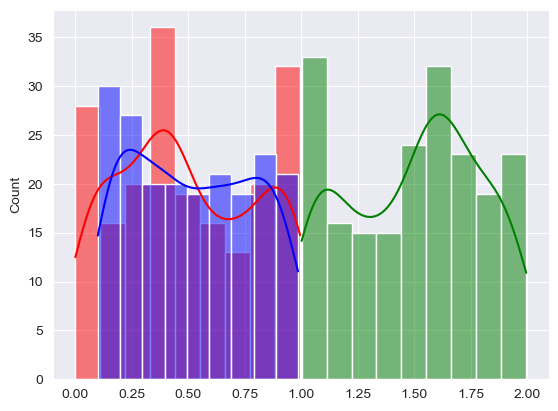

In [2]:
y = np.random.uniform(0, 1, 200)
p = np.random.uniform(0.1, 1, 200)
q = np.random.uniform(2, 1, 200)

sns.histplot(y, kde=True, color='red', label='dist y')
sns.histplot(p, kde=True, color='blue', label='dist p')
sns.histplot(q, kde=True, color='green', label='dist q')
plt.show()

In [3]:
def kl(data_1, data_2):
    return np.sum(data_1 * np.log(data_1 / data_2))

print(f'Kullback leibler (p, y): {kl(p, y)}')
print(f'Kullback leibler (q, y): {kl(q, y)}')
print(f'Kullback leibler (y, p): {kl(y, p)}')
print(f'Kullback leibler (y, q): {kl(y, q)}')

Kullback leibler (p, y): 52.574080892025215
Kullback leibler (q, y): 432.68033409829377
Kullback leibler (y, p): 33.37609387605704
Kullback leibler (y, q): -87.37506400080827


It is noticeable according to the formula that KL divergence is asymmetric. In cases where `y` is close to zero, but `q` is significantly non-zero, the effect is disregarded.

In [4]:
def jsd(data_1, data_2):
    # normalize
    data_1 /= data_1.sum()
    data_2 /= data_2.sum()
    mean = (data_1 + data_2) / 2
    return (kl(data_1, mean) + kl(data_2, mean)) / 2

print(f'JS Divergence between (p, y) {jsd(p, y)}')
print(f'JS Divergence between (y, p) {jsd(y, p)}')
print(f'JS Divergence between (q, y) {jsd(q, y)}')
print(f'JS Divergence between (y, q) {jsd(y, q)}')

JS Divergence between (p, y) 872.3665567073662
JS Divergence between (y, p) 884.4952703948406
JS Divergence between (q, y) 0.1015546996673651
JS Divergence between (y, q) 0.043504278222583806
